**IPL Data Analysis**

- Summary of Interesting Facts
- Best Players & Biggest Matches of IPL
- Analysis of Locations
- Toss Decision & Winning 
- DL Method Outcomes for different Teams

**Importing Libraries**

In [65]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import datetime
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
plt.style.use('fivethirtyeight')

In [66]:
# Reading the data 
matches = pd.read_csv('/content/data/matches.csv')

# Shape of the dataset
print(matches.shape)

(756, 18)


In [67]:
# Columns in the dataset
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**Summarizing Interesting Facts From Data**

In [68]:
print("Total number of teams: ", matches['team1'].nunique())
print("Total number of seasons: ", matches['Season'].nunique())
print("Total number of cities: ", matches['city'].nunique())
print("Total number of venues: ", matches['venue'].nunique())

Total number of teams:  15
Total number of seasons:  12
Total number of cities:  32
Total number of venues:  41


In [69]:
# Names of all the cities
cities = set(matches['city'].unique())
cities

# Note that 'Bengaluru' & 'Banglore' are the same locations

{'Abu Dhabi',
 'Ahmedabad',
 'Bangalore',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chandigarh',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kanpur',
 'Kimberley',
 'Kochi',
 'Kolkata',
 'Mohali',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam',
 nan}

In [70]:
matches['city'] = matches['city'].replace(('Bangalore'), ('Bengaluru'))
cities = set(matches['city'].unique())
cities

{'Abu Dhabi',
 'Ahmedabad',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chandigarh',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kanpur',
 'Kimberley',
 'Kochi',
 'Kolkata',
 'Mohali',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam',
 nan}

In [71]:
# Details of all the Upmires who had umpired for the matches
ump_1 = set(matches['umpire1'].unique())
ump_2 = set(matches['umpire2'].unique())
ump_3 = set(matches['umpire3'].unique())

ump = ump_1.intersection(ump_2)
ump = ump.intersection(ump_3)

print("Total number of Umpires: ", len(ump))
print()
print("Names of Umpires: ")
ump

Total number of Umpires:  20

Names of Umpires: 


{'A Nanda Kishore',
 'Anil Chaudhary',
 'Anil Dandekar',
 'Bruce Oxenford',
 'C Shamshuddin',
 'Chris Gaffaney',
 'Ian Gould',
 'K Ananthapadmanabhan',
 'KN Ananthapadmanabhan',
 'Kumar Dharmasena',
 'Nanda Kishore',
 'Nigel Llong',
 'Nitin Menon',
 'O Nandan',
 'Rod Tucker',
 'S Ravi',
 'Ulhas Gandhe',
 'Vineet Kulkarni',
 'Yeshwant Barde',
 nan}

In [72]:
# Matches where there were no umpires at all
matches[(matches['umpire1'].isnull()) &
        (matches['umpire2'].isnull()) &
        (matches['umpire3'].isnull())][['date','team1','team2','winner','umpire1','umpire2','umpire3']].reset_index(drop=True)

,date,team1,team2,winner,umpire1,umpire2,umpire3
0,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,NaN,NaN,NaN
1,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,NaN,NaN,NaN


**Exploring Best Players**

In [73]:
print('NUmber of players who have won the title of "Player of the Match": ', matches['player_of_match'].nunique())

# Names of Top 10 "Player of the Match"
print()
matches['player_of_match'].value_counts().sort_values(ascending=False).head(10)

NUmber of players who have won the title of "Player of the Match":  226



CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

In [74]:
# Matches where CH Gayle won the title "Player of the Match"
matches[matches['player_of_match'] == 'CH Gayle'][['date','team1','team2','winner']].reset_index(drop=True)

,date,team1,team2,winner
0,18-04-2017,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore
1,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders
2,22-04-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore
3,06-05-2011,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore
4,08-05-2011,Kochi Tuskers Kerala,Royal Challengers Bangalore,Royal Challengers Bangalore
5,14-05-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore
6,22-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore
7,27-05-2011,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
8,17-04-2012,Pune Warriors,Royal Challengers Bangalore,Royal Challengers Bangalore
9,20-04-2012,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore


In [75]:
# CH Gayle played for Kings XI Punjab after IPL-2018
# Let's analyze Kings XI Punjab & RCB after CH Gayle

after_gayle = matches[(matches['Season'] == 'IPL-2018') | (matches['Season'] == 'IPL-2019')]
after_gayle_rcb = after_gayle[(after_gayle['winner'] == 'Royal Challengers Bangalore') | 
                              (after_gayle['winner'] == 'Kings XI Punjab')]

print('Number of matches won: ')
print(after_gayle_rcb['winner'].value_counts())
print()
print('Win by total runs & wickets: ')
print(after_gayle_rcb[['win_by_runs','win_by_wickets','winner']].groupby(['winner']).sum())

Number of matches won: 
Kings XI Punjab                12
Royal Challengers Bangalore    11
Name: winner, dtype: int64

Win by total runs & wickets: 
                             win_by_runs  win_by_wickets
winner                                                  
Kings XI Punjab                       63              41
Royal Challengers Bangalore           56              37


In [76]:
# Total matches between KXIP & RCB after 2018
matches_won_rcb = matches[(matches['Season'] == 'IPL-2018') | (matches['Season'] == 'IPL-2019')]
matches_won_rcb = matches_won_rcb[((matches_won_rcb['team1'] == 'Royal Challengers Bangalore') & 
                                   (matches_won_rcb['team2'] == 'Kings XI Punjab')) | 
                                  ((matches_won_rcb['team1'] == 'Kings XI Punjab') & 
                                   (matches_won_rcb['team2'] == 'Royal Challengers Bangalore'))]

matches_won_rcb[['Season','team1','team2','winner']]

,Season,team1,team2,winner
643,IPL-2018,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore
683,IPL-2018,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore
723,IPL-2019,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore
737,IPL-2019,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore


In [77]:
# Player of the Match per season per team

@interact
def best_players(season = list(matches['Season'].value_counts().index), 
                 team = list(matches['team1'].value_counts().index)):
  a = matches[(matches['Season'] == season) & (matches['team1'] == team)]
  return a['player_of_match'].value_counts()

interactive(children=(Dropdown(description='season', options=('IPL-2013', 'IPL-2012', 'IPL-2011', 'IPL-2010', …

**Discovering the Biggest Matches in IPL**

       win_by_runs  win_by_wickets
count   756.000000      756.000000
mean     13.283069        3.350529
std      23.471144        3.387963
min       0.000000        0.000000
25%       0.000000        0.000000
50%       0.000000        4.000000
75%      19.000000        6.000000
max     146.000000       10.000000


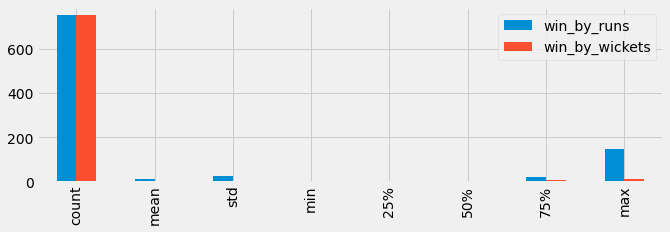

In [78]:
# Analysis of Winning Scores
print(matches[['win_by_runs','win_by_wickets']].describe())

plt.rcParams['figure.figsize'] = (10,3)
matches[['win_by_runs','win_by_wickets']].describe().plot(kind='bar')
plt.show()

In [79]:
# Check the team which won the match by 146 runs
matches[matches['win_by_runs'] == 146][['Season','team1','team2','winner','player_of_match']].reset_index(drop=True)

,Season,team1,team2,winner,player_of_match
0,IPL-2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians,LMP Simmons


In [80]:
# Check the team which won the match by 10 wickets
matches[matches['win_by_wickets'] == 10][['Season','team1','team2','winner','player_of_match']].reset_index(drop=True)

,Season,team1,team2,winner,player_of_match
0,IPL-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,CA Lynn
1,IPL-2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,Sandeep Sharma
2,IPL-2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,AC Gilchrist
3,IPL-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,DL Vettori
4,IPL-2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,JH Kallis
5,IPL-2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,SR Watson
6,IPL-2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians,DR Smith
7,IPL-2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,MEK Hussey
8,IPL-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,VR Aaron
9,IPL-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,B Kumar


**Understanding Match Results**

In [81]:
matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [82]:
# Probability of matches with Normal, Tie or No Result scenarios
normal = matches[matches['result'] == 'normal']
tie = matches[matches['result'] == 'tie']
no_result = matches[matches['result'] == 'no result']

print("Percentage of Matches where result is 'Normal': ", round(normal.shape[0]/matches.shape[0],2) * 100)
print("Percentage of Matches where result is 'Tie': ", round(tie.shape[0]/matches.shape[0],2) * 100)
print("Percentage of Matches where result is 'No Result': ", round(no_result.shape[0]/matches.shape[0],2) * 100)

Percentage of Matches where result is 'Normal':  98.0
Percentage of Matches where result is 'Tie':  1.0
Percentage of Matches where result is 'No Result':  1.0


In [83]:
# Check matches with Tie or No Result
print('Teams where Tie Happened: ')
print(matches[matches['result'] == 'tie'][['date','team1','team2']].reset_index(drop=True))
print()
print('Teams where there was No Result: ')
print(matches[matches['result'] == 'no result'][['date','team1','team2']].reset_index(drop=True))

Teams where Tie Happened: 
         date                        team1                        team2
0  29-04-2017                Gujarat Lions               Mumbai Indians
1  23-04-2009             Rajasthan Royals        Kolkata Knight Riders
2  21-03-2010              Kings XI Punjab          Chennai Super Kings
3  07-04-2013  Royal Challengers Bangalore          Sunrisers Hyderabad
4  16-04-2013             Delhi Daredevils  Royal Challengers Bangalore
5  29-04-2014             Rajasthan Royals        Kolkata Knight Riders
6  21-04-2015             Rajasthan Royals              Kings XI Punjab
7  30-03-2019        Kolkata Knight Riders               Delhi Capitals
8  02-05-2019               Mumbai Indians          Sunrisers Hyderabad

Teams where there was No Result: 
         date                        team1                        team2
0  21-05-2011             Delhi Daredevils                Pune Warriors
1  29-04-2015  Royal Challengers Bangalore             Rajasthan Royals
2 

**Uncovering the Most Popular IPL Seasons & Teams**

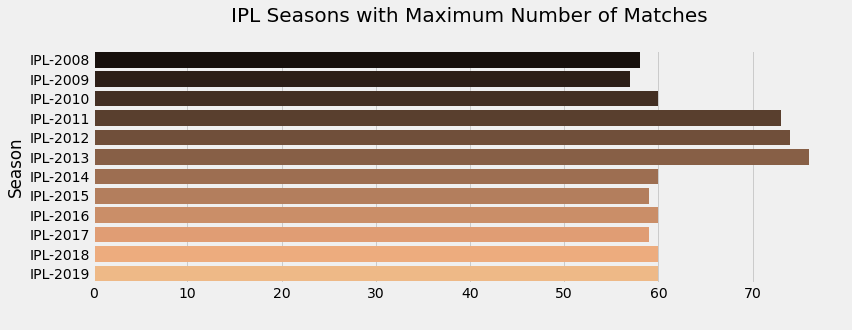

In [84]:
plt.rcParams['figure.figsize'] = (12,4)
sns.countplot(y = matches['Season'].sort_values(), palette = 'copper')
plt.title('IPL Seasons with Maximum Number of Matches\n', fontsize=20)
plt.xlabel(' ')
plt.show()

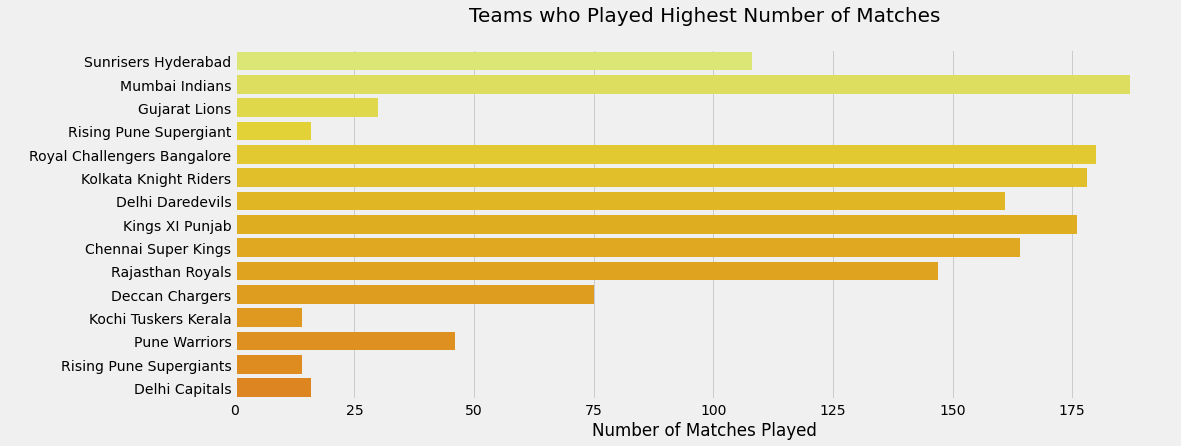

In [85]:
team = matches['team1'].append(matches['team2'])

plt.rcParams['figure.figsize'] = (15,6)
sns.countplot(y = team, palette = 'Wistia')
plt.title('Teams who Played Highest Number of Matches\n', fontsize=20)
plt.xlabel('Number of Matches Played')
plt.ylabel(' ')
plt.show()

**Realizing the Locations of All IPL Seasons**

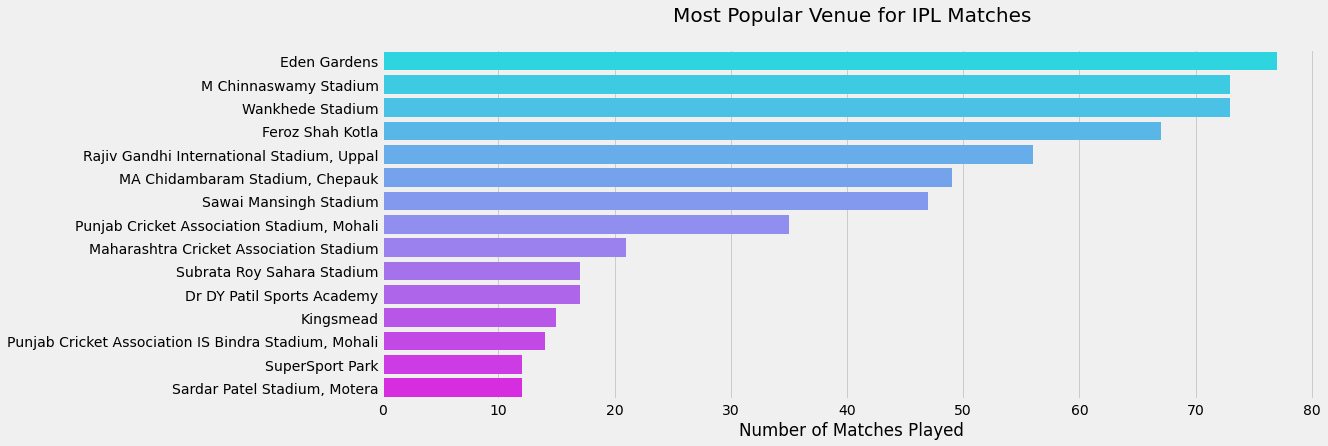

In [86]:
plt.rcParams['figure.figsize'] = (15,6)
sns.barplot(y = matches['venue'].value_counts().head(15).index,
            x = matches['venue'].value_counts().head(15).values,
            palette = 'cool')
plt.title('Most Popular Venue for IPL Matches\n', fontsize=20)
plt.xlabel('Number of Matches Played')
plt.show()

In [87]:
@interact
def city(season = list(matches['Season'].value_counts().index)):
  cities = matches.groupby(['Season','city'])['id'].agg('count').reset_index()
  cities.rename(columns={'id':'count'}, inplace=True)
  return cities[cities['Season'] == season].reset_index(drop=True).sort_values(by='count', ascending=False)

interactive(children=(Dropdown(description='season', options=('IPL-2013', 'IPL-2012', 'IPL-2011', 'IPL-2010', …

**Comparing Toss Winners & Winners**

In [88]:
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [89]:
# Check probability for a team to win if they win the toss
not_same = matches[matches['toss_winner'] != matches['winner']]
same = matches[matches['toss_winner'] == matches['winner']]

print("Percentage of Matches where Toss Winner is NOT the Winner: ", round(not_same.shape[0]/matches.shape[0],4)*100)
print("Percentage of Matches where Toss Winner is the Winner: ", round(same.shape[0]/matches.shape[0],2)*100)

Percentage of Matches where Toss Winner is NOT the Winner:  48.02
Percentage of Matches where Toss Winner is the Winner:  52.0


In [90]:
# Teams who won when they won the toss

@interact
def tosswin_wins(team = matches['team1'].value_counts().index):
  x = pd.crosstab(matches['toss_winner'], matches['winner'])
  return x[[team]].sort_values(by=team, ascending=False)

interactive(children=(Dropdown(description='team', options=('Mumbai Indians', 'Kings XI Punjab', 'Chennai Supe…

**Winning Locations for All Teams**

In [91]:
# In which city, did all IPL teams won the maximum number of matches

@interact
def winning_locations(team = list(matches['team1'].value_counts().index)):
  z = matches[['winner','city']]
  z = z[z['winner'] == team]
  return z['city'].value_counts()

interactive(children=(Dropdown(description='team', options=('Mumbai Indians', 'Kings XI Punjab', 'Chennai Supe…

**Analyzing Toss Decisions**

In [92]:
matches['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [93]:
# Winning probablity of a team if they choose to 'bat' first or 'field' first
field = matches[matches['toss_decision'] == 'field']
bat = matches[matches['toss_decision'] == 'bat']

print("Percentage of Matches where Toss Decision is 'field': ", round(field.shape[0]/matches.shape[0], 2)*100)
print("Percentage of Matches where Toss Decision is 'bat': ", round(bat.shape[0]/matches.shape[0], 2)*100)

Percentage of Matches where Toss Decision is 'field':  61.0
Percentage of Matches where Toss Decision is 'bat':  39.0


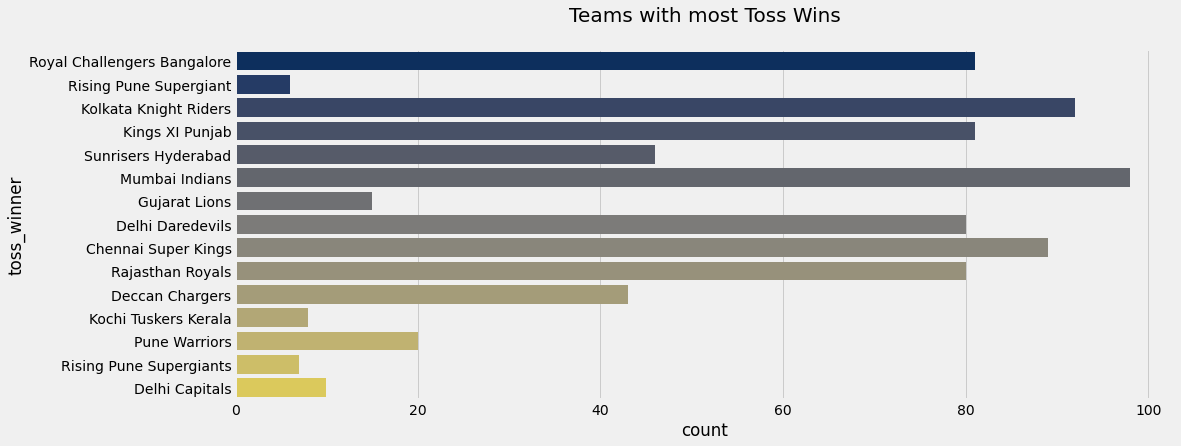

In [94]:
# Teams with most Toss Wins
sns.countplot(y = matches['toss_winner'], palette = 'cividis')
plt.title('Teams with most Toss Wins\n', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


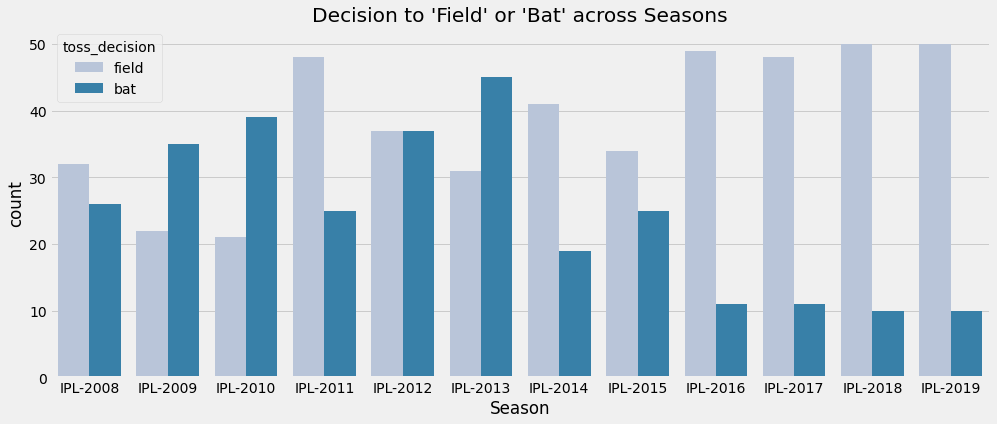

In [95]:
# Comparing Toss Decisions
plt.rcParams['figure.figsize'] = (15,6)
sns.countplot(matches['Season'].sort_values(), hue = matches['toss_decision'], palette = 'PuBu')
plt.title("Decision to 'Field' or 'Bat' across Seasons")
plt.show()

In [96]:
@interact
def toss_decision(team = list(matches['toss_winner'].value_counts().index)):
  x = matches[matches['toss_winner'] == team]
  return x['toss_decision'].value_counts()

interactive(children=(Dropdown(description='team', options=('Mumbai Indians', 'Kolkata Knight Riders', 'Chenna…

**Winner of those matches where DL was applied**

In [97]:
a = matches[matches['dl_applied'] == 1]
a['winner'].value_counts()

Kolkata Knight Riders          4
Royal Challengers Bangalore    3
Kings XI Punjab                2
Chennai Super Kings            2
Delhi Daredevils               2
Sunrisers Hyderabad            2
Rising Pune Supergiants        2
Kochi Tuskers Kerala           1
Rajasthan Royals               1
Name: winner, dtype: int64

In [98]:
# Checking complete data of matches where DL was applied
matches[matches['dl_applied'] == 1][['Season','team1','team2','winner']]

,Season,team1,team2,winner
56,IPL-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders
99,IPL-2008,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab
102,IPL-2008,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings
119,IPL-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils
122,IPL-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders
148,IPL-2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings
251,IPL-2011,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala
280,IPL-2011,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders
290,IPL-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore
488,IPL-2014,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad
